In [3]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregando o modelo 
def load_model(model):
    os.chdir(input("Qual o diretorio do modelo?"))
    file = open(model, 'rb')
    model = pickle.load(file)
    return model

model = load_model('sgd_model_1801.sav')

In [4]:
# Carregando o modelo 
def load_data(file):
    """
    Função para carregamento de arquivo 
    
    """
    path = input('Por favor adicione o diretório de trabalho?')
    for dirname, _, filename in os.walk(path, topdown = True):
        for filename in filename:
            if filename == file:
                data = pd.read_csv(os.path.join(dirname,filename), header = None)
            else:
                pass
    print("Carregamento finalizado!!!")
    return data

X_treino = load_data('X_treino.csv')
y_treino = load_data('y_treino.csv')
X_teste  = load_data('X_teste.csv')
y_teste  = load_data('y_teste.csv')

Carregamento finalizado!!!
Carregamento finalizado!!!
Carregamento finalizado!!!
Carregamento finalizado!!!


In [5]:
def class_report(model, X, Y, x, y, cv=10, scoring='roc_auc'):
    
    cv_strategy = StratifiedKFold(n_splits=cv)
    
    pred = model.predict(x)
    print(classification_report(y,pred)) 
    print(f"A ROC_AUC cross-validada nos dados de treino é {round(np.mean(cross_val_score(model, X, Y,scoring=scoring, cv=cv_strategy, n_jobs=-1)),2)}")
    return print(f"A ROC_AUC cross-validada nos dados de teste é {round(np.mean(cross_val_score(model, x, y,scoring=scoring, cv=cv_strategy, n_jobs=-1)),2)}")

print('>Gerando report...')
class_report(model=model, X=X_treino, Y=y_treino, x=X_teste ,y=y_teste)

>Gerando report...
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.78     14629
         1.0       0.75      0.86      0.80     14576

    accuracy                           0.79     29205
   macro avg       0.80      0.79      0.79     29205
weighted avg       0.80      0.79      0.79     29205

A ROC_AUC cross-validada nos dados de treino é 0.89
A ROC_AUC cross-validada nos dados de teste é 0.89


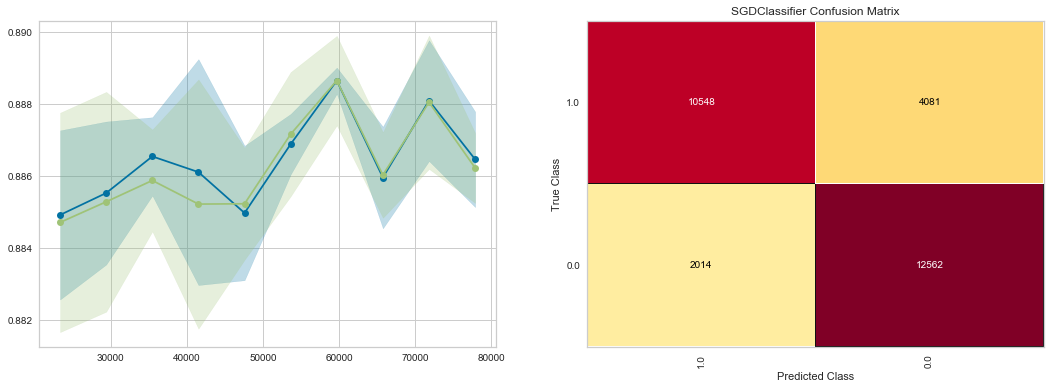

In [9]:
def evaluation(estimator, X, Y, x, y):
    
    classes = y_treino[0].unique()
    f, (ax,ax1) = plt.subplots(1,2,figsize=(18,6))

    #Confusion Matrix
    cmm = ConfusionMatrix(model=model,ax=ax1,  classes=classes, label_encoder={0.0: 'Negativo', 1.0: 'Positivo'})
    cmm.score(x, y)

    #Learning Curve
    cv_strategy = StratifiedKFold(n_splits=3)
    sizes = np.linspace(0.3,1.0,10)
    visualizer = LearningCurve(model, ax=ax, cv=cv_strategy, scoring='roc_auc', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X, Y)        


    cmm.poof(), visualizer.poof()
    plt.show()
    
evaluation(model,X_treino, y_treino,X_teste, y_teste)